MICROSOFT PROJECT
BUSINESS UNDERSTANDING
Microsoft wants to establish a movie studio but has little or knowledge of what it entails to really hit the ground running and make profits in the film industry. Luckily, there is some data available which can be analyzed to come up with actionable insights for the executives. I'll use the following datasets for this project:

bommovie dataset
movie_info dataset
IM.db database
In this project, i will be looking to investigate the following business questions:

Who are the potential competitors who are currently operating in the market?
How does the domestic and foreign markets compare?
Which genres are currently fetching top dollar in the boxoffice?
Does the length of a film affect its popularity and consequently its revenues?
Which genres are currently having the highest popularity?

In [1]:
# importing libraries 
import pandas as pd 

import sqlite3

import matplotlib.pyplot as plt

import seaborn as sns 

In [2]:


df = pd.read_csv('bom.movie_gross.csv.gz')
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
# checking structure and missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
# descriptive statistics
df.describe() 

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [ ]:
# dropping any duplicated rows
df = df.drop_duplicates()

(i)Converting the column 'foreign gross' to a float type
The foreign_gross column seems to be a string. The expectation would be for it to be numeric column for the amount of money made in the foreign market

In [9]:
# converting foreign gross to float
foreign_gross_float = df['foreign_gross'].str.replace(',', '').astype(float)

In [10]:
# convert from series to dataframe
df_foreign = pd.DataFrame(foreign_gross_float)  

In [ ]:
# join the two dataframes
bommovie_clean = pd.concat([bommovie_clean, df_foreign], axis=1) 

In [ ]:
# select foreign_gross as float and drop foreign_gross as object
bommovie_clean = bommovie_clean.iloc[:,[0,1,2,4,5]]  

In [ ]:
# check the new dataframe's col types
bommovie_clean.info() 

1. Loading your friend's data into a dictionary
Someone's feet on table facing a television

Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization, boasting over 200 million subscribers as of January 2021.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining.

As evidence of this, they have provided us with the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.

If we're going to be working with this data, we know a good place to start would be to probably start working with pandas. But first we'll need to create a DataFrame from scratch. Let's start by creating a Python object covered in Intermediate Python: a dictionary!

In [2]:
# Create the years and durations lists
years =[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103,101,99,100,100,95,95,96,93,90]

# Create a dictionary with the two lists
movie_dict = {'years':years,'durations':durations}

# Print the dictionary
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


In [3]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df =pd.DataFrame(movie_dict)

# Print the DataFrame
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


2. Creating a DataFrame from a dictionary

To convert our dictionary movie_dict to a pandas DataFrame, we will first need to import the library under its usual alias. We'll also want to inspect our DataFrame to ensure it was created correctly. Let's perform these steps now.

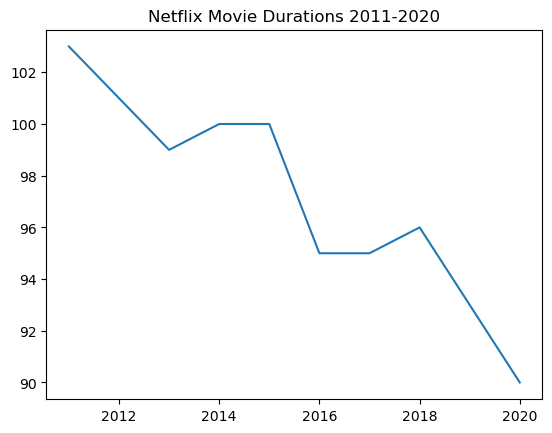

In [4]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df['years'],durations_df['durations'])

# Create a title
plt.title('Netflix Movie Durations 2011-2020')

# Show the plot
plt.show()

4. Loading the rest of the data from a CSV
Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:

What does this trend look like over a longer period of time?
Is this explainable by something like the genre of entertainment?
Upon asking our friend for the original CSV they used to perform their analyses, they gladly oblige and send it. We now have access to the CSV file, available at the path "datasets/netflix_data.csv". Let's create another DataFrame, this time with all of the data. Given the length of our friend's data, printing the whole DataFrame is probably not a good idea, so we will inspect it by printing only the first five rows.

In [8]:
# Read in the CSV as a DataFrame
netflix_df =pd.read_csv("datasets/netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head().DictReader (f)
netflix_csv = list(reader)
#print the first 5 rows 
import csv
with open("netflix_data.csv") as f;
reader = csv

SyntaxError: invalid syntax (1564043870.py, line 9)

In [9]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration']<60]

# Print the first 20 rows of short_movies
short_movies.head(20)

NameError: name 'netflix_movies_col_subset' is not defined

3. A visual inspection of our data

Alright, we now have a pandas DataFrame, the most common way to work with tabular data in Python.
Now back to the task at hand. We want to follow up on our friend's
assertion that movie lengths have been decreasing over time. A great place to start will be a visualization of the data.

Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations. There are many ways to visualize data in Python, but matploblib.pyplot is one of the most common packages to do so.

Note: In order for us to correctly test your plot, you will need to initalize a matplotlib.pyplot Figure object, which we have already provided in the cell below. You can continue to create your plot as you have learned in Intermediate Pytho

In [10]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only.loc[:, ['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

NameError: name 'netflix_df' is not defined